In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WomensClothing E-Commerce Reviews.csv to WomensClothing E-Commerce Reviews.csv


Dữ liệu về WomensClothing E-Commerce Review: https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing

*I. CHUẨN BỊ VÀ ĐÁNH GIÁ CHUNG DỮ LIỆU*

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import string
import seaborn as sns
plt.style.use('ggplot')

Data= pd.read_csv(io.BytesIO(uploaded['WomensClothing E-Commerce Reviews.csv']))
Data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
Data.info()
#Data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
# Xóa cột đầu khỏi dữ liệu
del Data['Unnamed: 0']
# Chuyển ClothingID sang dữ liệu đối tượng
Data['Clothing ID'] = Data['Clothing ID'].astype(object)


In [ ]:
Data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
duplicates = Data.duplicated().sum()
if duplicates == 0:
    print("Không có dòng nào trùng lặp trong dữ liệu")
else:
    print('Có: ', str( duplicates )," dòng bị trùng lặp")

Có:  21  dòng bị trùng lặp


In [ ]:
# Kiểm tra dữ liệu rỗng
Data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Title có thể trống, Review Text là dữ liệu đánh giá nên không thể trống


In [ ]:

Data= Data.dropna(subset = ['Review Text', 'Division Name', 'Department Name', 'Class Name'])

In [ ]:
Data.isna().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22628 non-null  object
 1   Age                      22628 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              22628 non-null  object
 4   Rating                   22628 non-null  int64 
 5   Recommended IND          22628 non-null  int64 
 6   Positive Feedback Count  22628 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.9+ MB


1. Tiến hành đánh giá dữ liệu



* **Đánh giá tuổi của khách hàng**











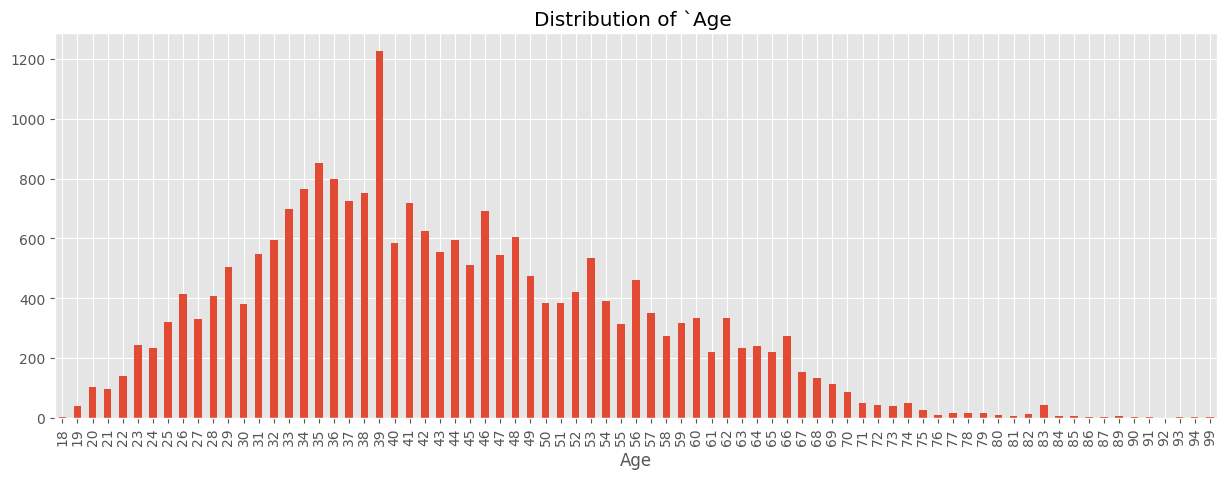

In [ ]:
num_cols = ['Age', 'Positive Feedback Count']
ord_cols = ['Rating', 'Recommended IDN']

fig = plt.figure(figsize=(15,5))

# Mối quan hệ với tuổi đánh giá
ax = Data['Age'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Distribution of `Age ')
ax.set_xlabel('Age')
plt.show()


Từ đồ thị về độ tuổi khách hàng ta có thể thấy rằng phần lớn khách hàng đều là
phụ nữ trung tuổi với số lượng khách hàng đông nhất là gần 40 tuổi. Sau đó số8
lượng khách hàng giảm dần khi độ tuổi giảm đi hoặc tăng lên. Điều đó cũng giải
thích được về việc phần lớn sản phẩm được mua đều là những sản phẩm thông
dụng, có tính thực tế cao.

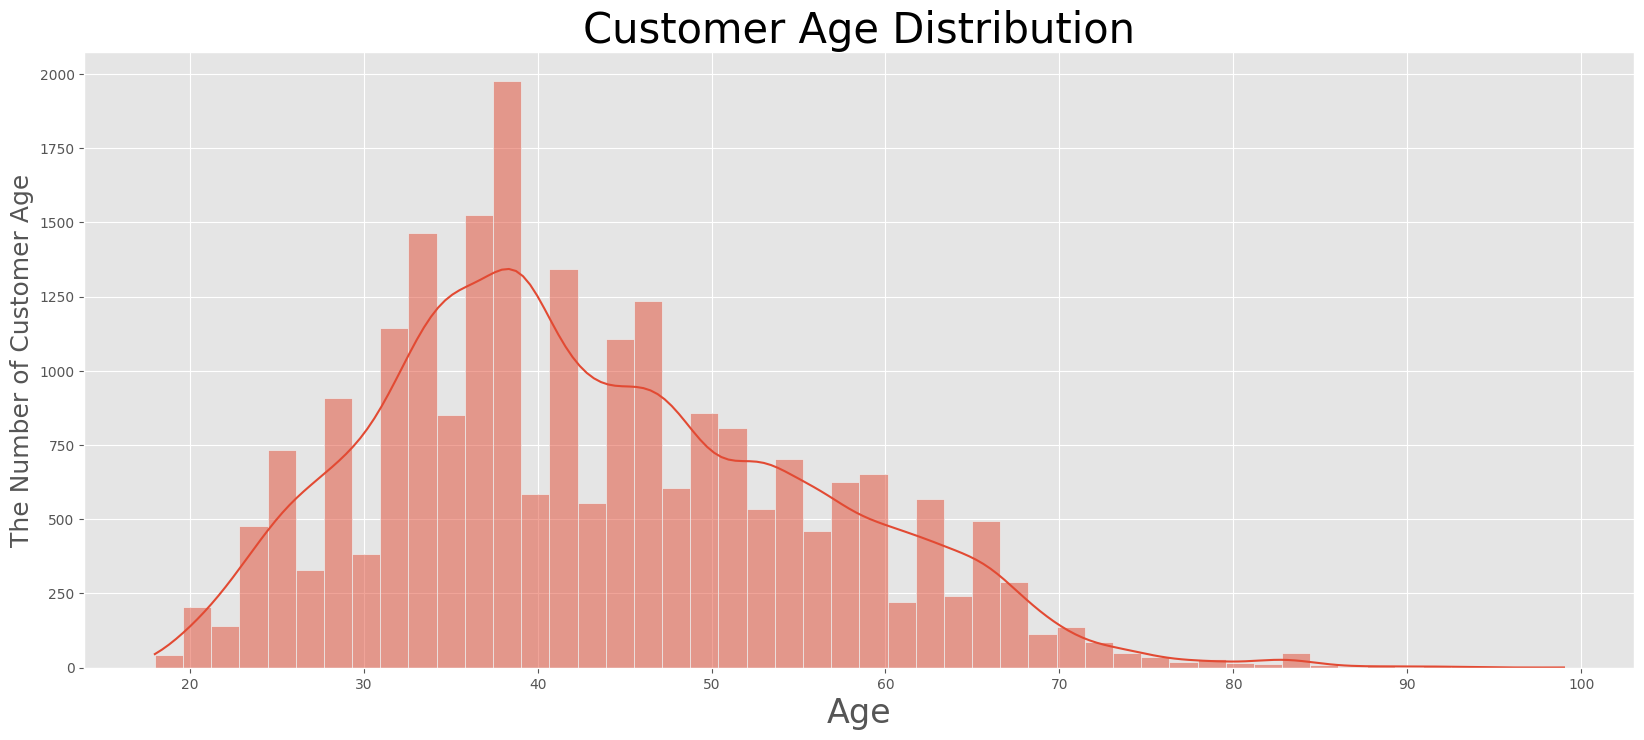

In [ ]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)
sns.histplot(Data, x='Age', kde = True, bins = 50);

Việc phân phối độ tuổi đánh giá là bình thường, nhưng hỏi lệch về bên phải. Cho thấy phụ nữ trẻ có xu hướng mau sắm trực tuyến nhiều hơn



*   **Đánh giá mức độ hữu ích của đánh giá khách hàng**






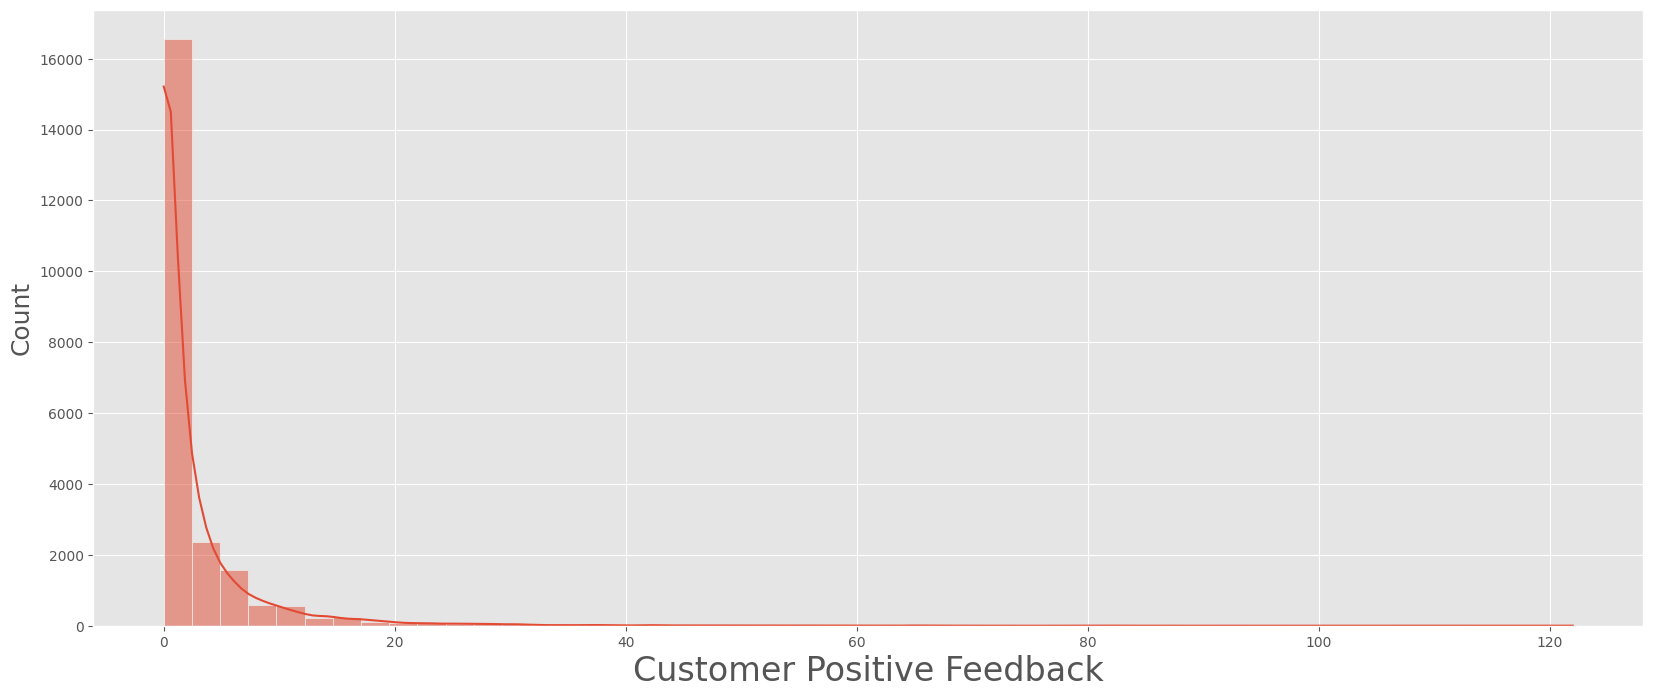

In [ ]:
plt.figure(figsize = (20, 8))
plt.xlabel("Customer Positive Feedback", fontsize=24)
plt.ylabel("Count", fontsize=18)
sns.histplot(Data, x='Positive Feedback Count', kde = True, bins = 50);

Số phản hồi tích cực là rất thấp do hầu hết bài đánh giá không nhận được phản hồi từ người đọc




*    **Biểu thị mức đánh giá của khách hàng**




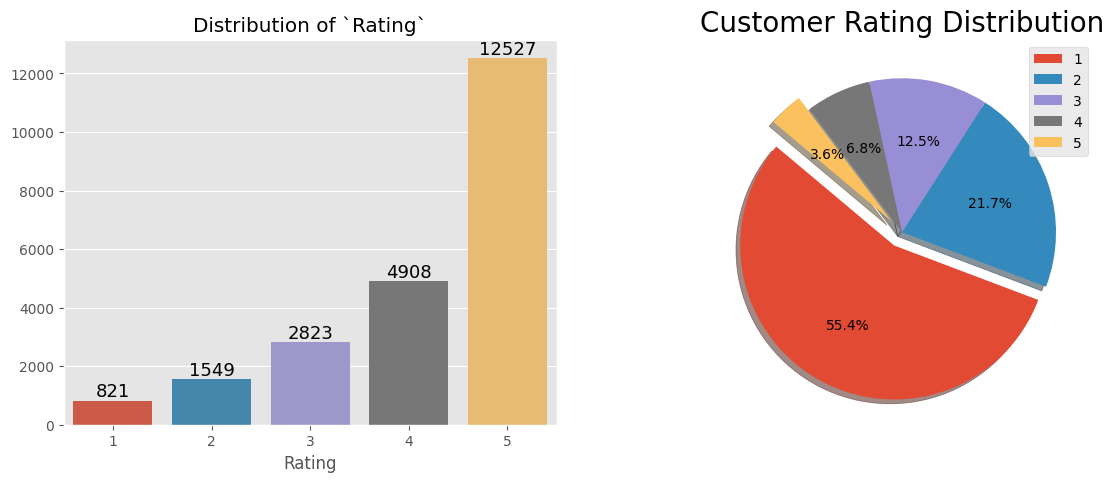

In [ ]:
fig = plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.countplot(data= Data, x='Rating')
plt.title('Distribution of `Rating`')
plt.ylabel('')
total = float(len(Data['Rating']))

for index,value in enumerate(Data.Rating.value_counts().sort_values()):
   plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize =13);
plt.subplot(1,2,2)
explode = [0.1, 0, 0, 0, 0.1]
plt.pie(Data['Rating'].value_counts(),explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1', '2', '3', '4','5'])
plt.title('Customer Rating Distribution', fontsize=20)
plt.axis('off');
plt.show()

Hầu hết các khách hàng đều đánh giá tốt về sản phẩm. Có hơn 50% khách hàng
đánh giá “5” cho sản phẩm của cửa hàng cho thấy điều đó. Nhưng bên cạnh đó,
có đến khoảng hơn 11% khách hàng không hài lòng về sản phẩm và bình chọn
cho “1” và “2”. Chứng tỏ chưa phải hoàn toàn sản phẩm của cửa hàng đều làm
hài lòng khách hàng và số khách hàng không thích sản phầm còn khá lớn.



*   **Đánh giá tỷ lệ khách hàng được đề xuất**




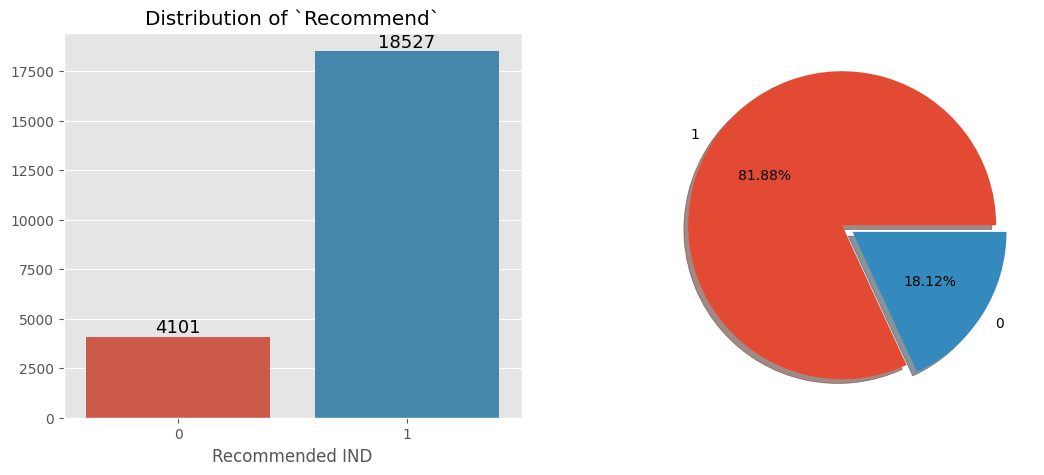

In [ ]:
fig = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
ax = sns.countplot(data=Data, x='Recommended IND')
plt.title('Distribution of `Recommend`')
plt.ylabel('')
#total = float(len(Data['Recommended IND']))
for index,value in enumerate(Data['Recommended IND'].value_counts().sort_values()):
   plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize =13);
#for p in ax.patches:
    #height = p.get_height()
    #ax.text(p.get_x()+p.get_width()/2., height+0.5, '{:.1%}'.format(height/total), ha="center")
plt.subplot(1,2,2)
plt.pie(x= Data['Recommended IND'].value_counts() , labels = ("1","0"),
explode = (0, 0.08) , shadow = True , autopct = '%1.2f%%')
plt.show()

Phần lớn các sản phẩm trong cửa hàng đều được khách hàng đề xuất để mua.
Điều đó chứng tỏ cửa hàng có chất lượng tốt, đa số đều đáp ứng được nhu cầu
của khách hàng và hầu hết khách hàng đều đánh giá tốt về sản phẩm.





*   **Mối quan hệ giữa điểm đánh giá và đề xuất**




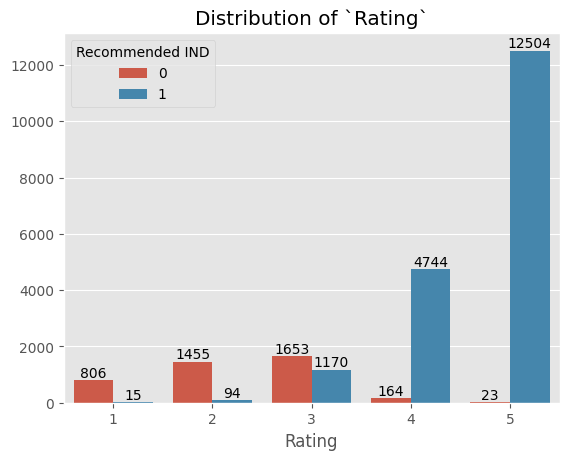

In [ ]:
ax = sns.countplot(data=Data, x='Rating', hue='Recommended IND')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of `Rating`')
plt.ylabel('')
plt.show()

- Nhận thấy răng đa số khách hàng đánh giá mặt hàng 4, 5 sao đều đề xuất giới thiệu mua hàng
- Những khách hàng đưa ra đánh giá 1, 2 sao đều không giới thiệu mặt hàng cho người quen




**Xem một số đánh giá 5 sao nhưng không giới thiệu và đánh giá 1 sao mà có giới thiệu
-> Họ nghĩ chỉ phù hợp với họ nhưng chưa chắc chắn phù hợp với người khác**

In [ ]:
five_no_rec = Data[(Data['Rating'] == 5) & (Data['Recommended IND'] == 0)]
five_no_rec['Review Text'][5:10]

7443     I ordered my usual sz s during the promo. arrived yesterday & the fit is perfect w/ a little room to spare for layering. it's a snap front closure, front patch pockets, & attached hood that is small to med size-not huge or overwhelming. it's 100% acrylic which isn't my 1st choice, but soft, comfy & seems good quality. length falls abt 3" below my knees. arm length is fine. pretty much looks as in the pic including the marled color. if you are in need of a great functional long swtr w/ good looks
9161                                                                                                                                                                                                                                This an absolutely beautiful quality stylish coat but through no fault of the coat, i had to return it because i looked like a bear in it. i'm too short and too round around the middle for this type check and this type material. i wouldn't want to discourage any

**Xem một số đánh giá 1 sao  nhưng họ vấn đề xuất giới thiệu để xem xét tình hình mặt hàng
-> Nhận thấy họ không thích mặt hàng nhưng họ nghĩ người khác sẽ thích**

In [ ]:
one_rec = Data[(Data['Rating'] == 1) & (Data['Recommended IND'] == 1)]
one_rec['Review Text'][:5]

2427                                                                                                                                                                                                                                                                                                                                                                                                                        Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.
2872                                                                                                                                                                                                                                                                                                                                                                            Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased

**Xem xét trung bình giữa đánh giá và đề xuất theo độ tuổi**

In [ ]:
Data.groupby('Rating').mean()

<ipython-input-32-4ce051ed5e90>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Data.groupby('Rating').mean()


,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count
Rating,,,,,
1,11976.864799,917.232643,43.710110,0.018270,3.548112
2,11761.391866,926.342802,42.609425,0.060684,3.360232
3,11692.969536,928.303224,42.163301,0.414453,3.198725
4,11726.172372,922.991035,43.012225,0.966585,2.488386
5,11732.919614,915.804742,43.696496,0.998164,2.410074


- Mỗi xếp hạng có độ tuổi trung bình gần như nhau, do đó, có vẻ khách hàng để đánh giá tương tự nhau bất chấp độ tuổi của họ.
- Xếp hạng thấp hơn có nhiều khả năng nhận được số lượng phản hồi tích cực hơn, điều này ngụ ý rằng khách hàng đánh giá cao hơn các đánh giá tiêu cực của người khác (điều này ngăn cản họ thực hiện những gì họ cho là 'mua hàng kém chất lượng') so với đánh giá tiêu cực của họ. đánh giá tích cực.





*   **Đồ thị tương quan giữa độ tuổi, đánh giá và đề xuất**





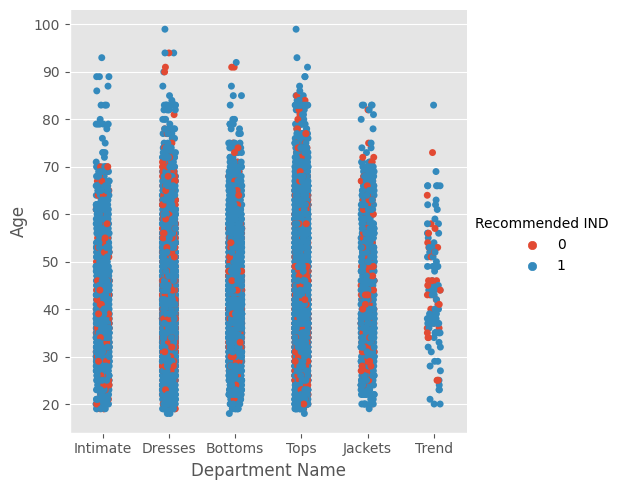

In [ ]:
sns.catplot(x="Department Name", y="Age", hue="Recommended IND",data= Data)

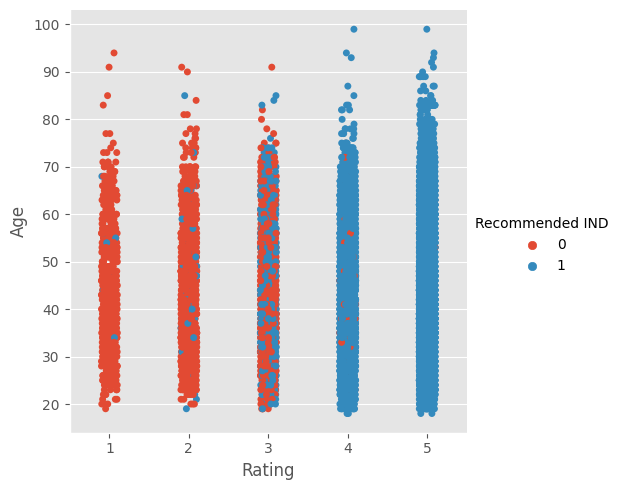

In [ ]:
sns.catplot(x='Rating', y='Age', hue='Recommended IND',data= Data)

Nhìn chung, với mọi độ tuổi thì mức đánh giá điểm cao đều đề xuất cho người
dùng.

2. **Đánh giá theo phân loại**

In [ ]:
# Sửa lỗi chính tả
Data['Division Name'] = Data['Division Name'].replace({'Initmates': 'Intimates'})

In [ ]:
# Phân loại theo nhóm mặt hàng và nhóm đánh giá
text_cols = ['Title', 'Review Text']
cat_cols = ['Division Name', 'Department Name', 'Class Name']

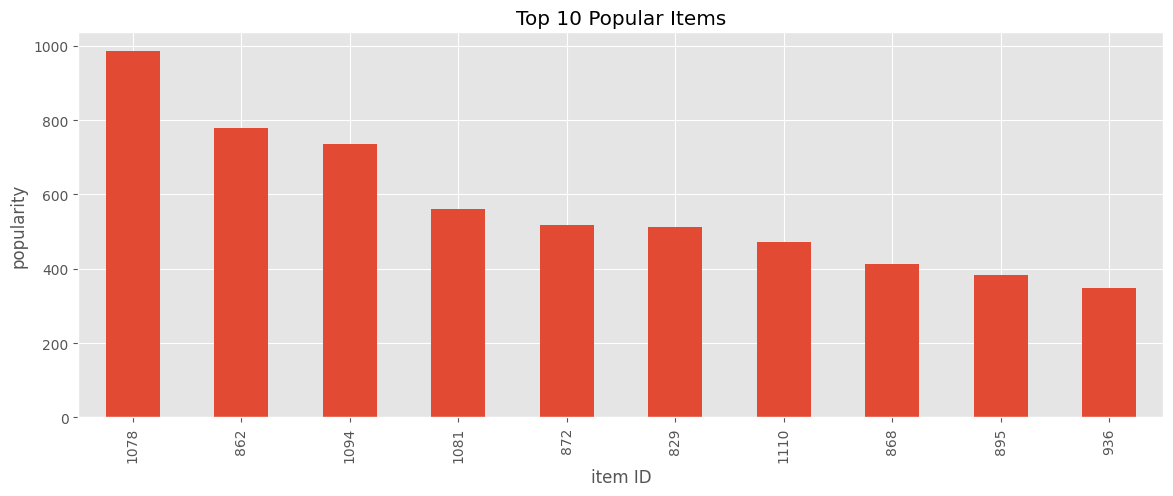

In [ ]:
####Top 50 Most Popular item
fig = plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
plt.xlabel('item ID')
plt.ylabel('popularity')
plt.title("Top 10 Popular Items")
Data['Clothing ID'].value_counts()[:10].plot(kind='bar');



* **Đánh giá tỷ lệ loại sản phẩm**



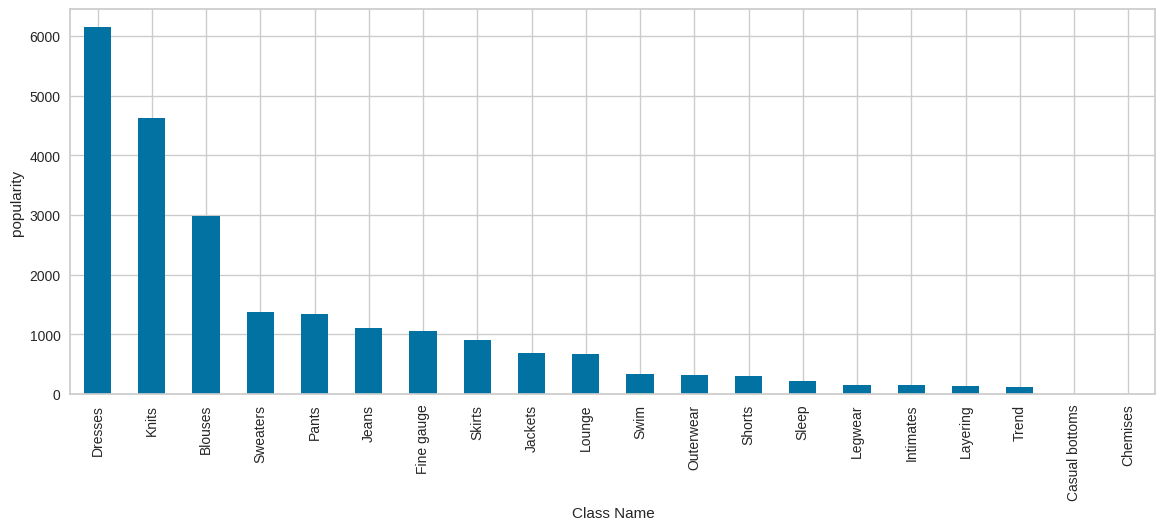

In [ ]:
fig = plt.figure(figsize=(14, 5))
plt.xticks(rotation=40)
plt.xlabel('Class Name')
plt.ylabel('popularity')
Data['Class Name'].value_counts().plot(kind='bar');

Thấy rằng, váy là loại sản phẩm được khách hàng ưu chuộng nhất

***Phân loại theo mức phân loại hàng với số lượng đánh giá**


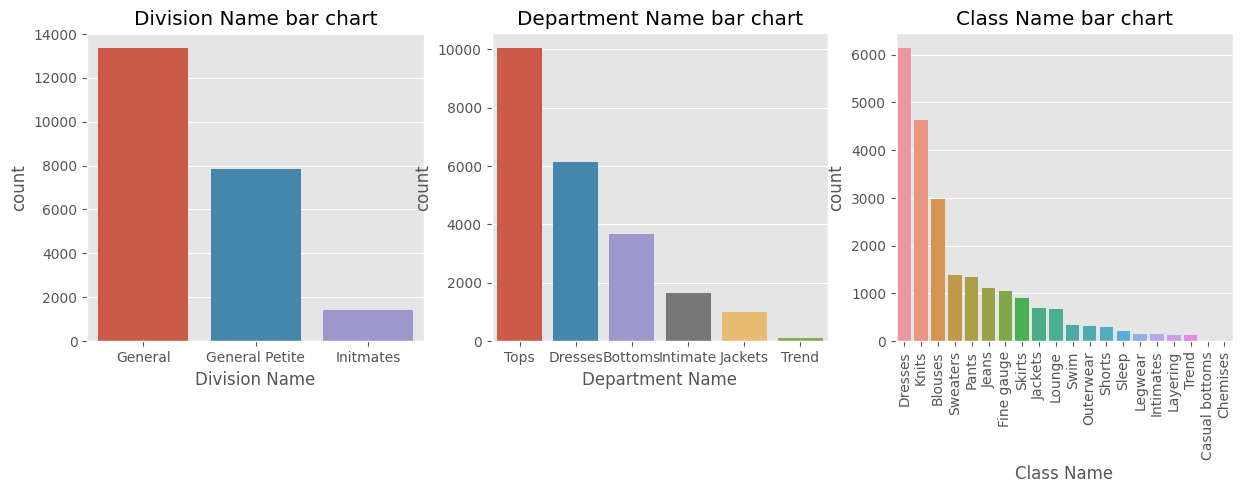

In [ ]:
fig = plt.figure(figsize=(20,4))

# Tạo biểu đồ theo các mức phân loại hàng với số lượng dánh giá
for i, col in enumerate(cat_cols):
    plt.subplot(1,4,i+1)
    plt.title(col+' bar chart')
    sns.countplot(data=Data, x=col, order = Data[col].value_counts().index)
    if col == 'Class Name':
        plt.xticks(rotation=90)



**Đồ thị đánh giá loại sản phẩm, bộ phận sản phẩm,lớp cấp của sản phẩm**

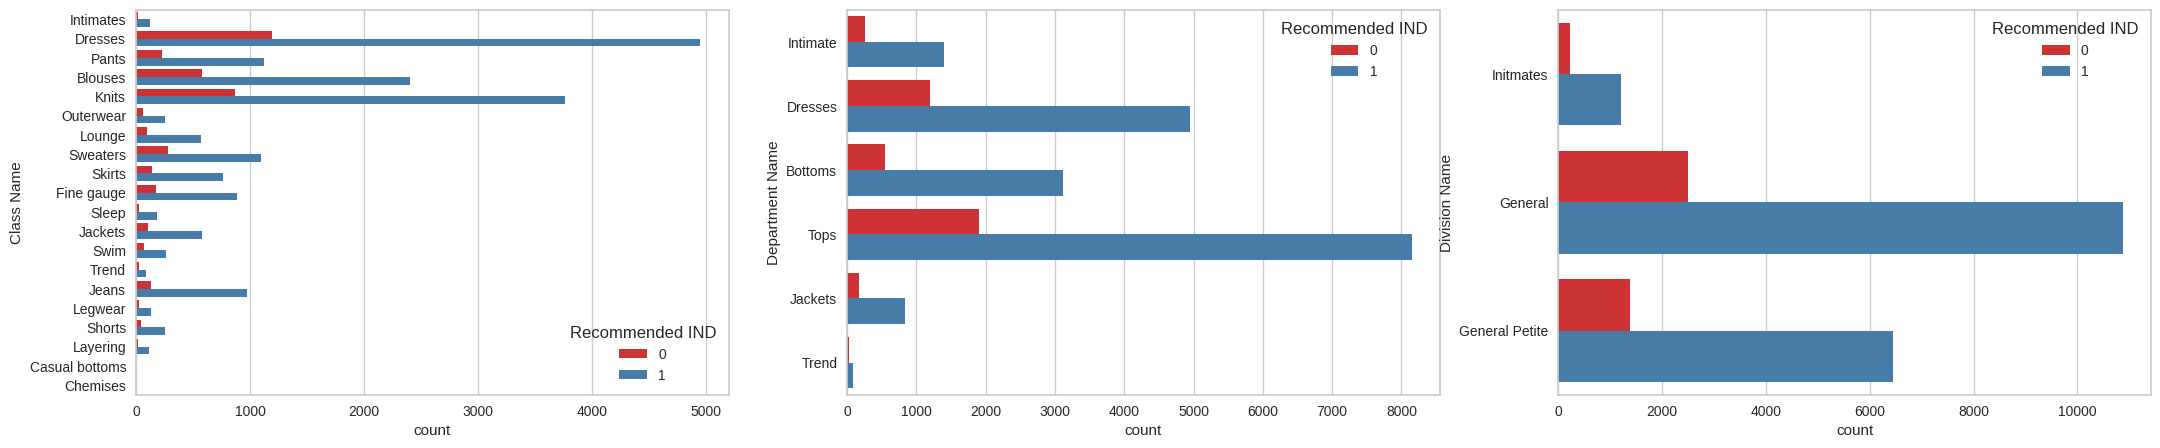

In [ ]:
fig = plt.figure(figsize=(26,5))
plt.subplot(1,3,1)
sns.countplot(data=Data, y='Class Name', hue='Recommended IND',  palette = "Set1")
plt.subplot(1,3,2)
sns.countplot(data=Data, y='Department Name', hue='Recommended IND' ,palette = "Set1")
plt.subplot(1,3,3)
sns.countplot(data=Data, y='Division Name', hue='Recommended IND', palette = "Set1")
plt.show()

- Hầu hết các mặt hàng được xem xét đều thuộc bộ phận Tổng hợp. Hai loại còn lại là General Petite và Intimates, hàm ý rằng có lẽ một trong những thị trường mục tiêu của nhà cung cấp là Trẻ em
- Các mặt hàng được đánh giá nhiều nhất là Tops. Ở đây tops đề cập đến tất cả các mặt hàng được mặc ở phần trên cơ thể (không chỉ áo phông)
Các mặt hàng được xem xét nhiều nhất là váy.

***Đánh giá phân loại bộ phận cấp cao sản phẩm**

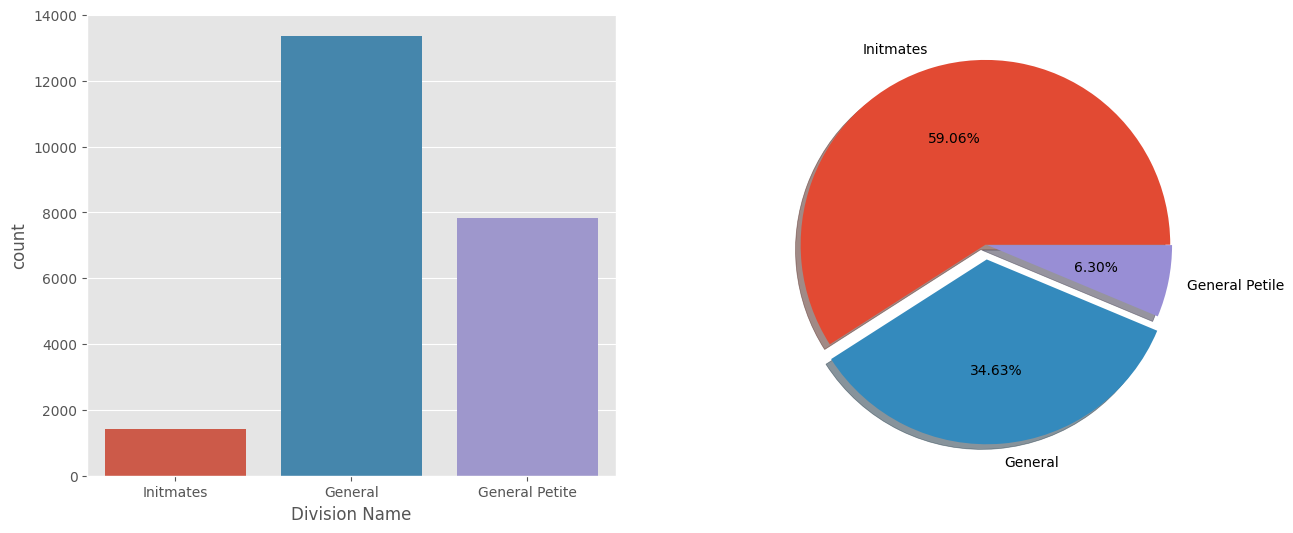

In [ ]:
plt.figure( figsize = (15 , 6))
plt.subplot (1, 2, 1)
sns.countplot(x = Data['Division Name'], data = Data)
plt . subplot (1, 2, 2)
plt.pie(x= Data['Division Name'].value_counts() ,labels =("Initmates","General","General Petile") ,explode = (0, 0.08 ,0.01) , shadow = True , autopct = '%1.2f%%')

plt . show ()

Ở đây, hầu hết các mặt hàng được mua thuộc các loại hàng thông thường

***Đánh giá phân loại bộ phận sản phẩm**

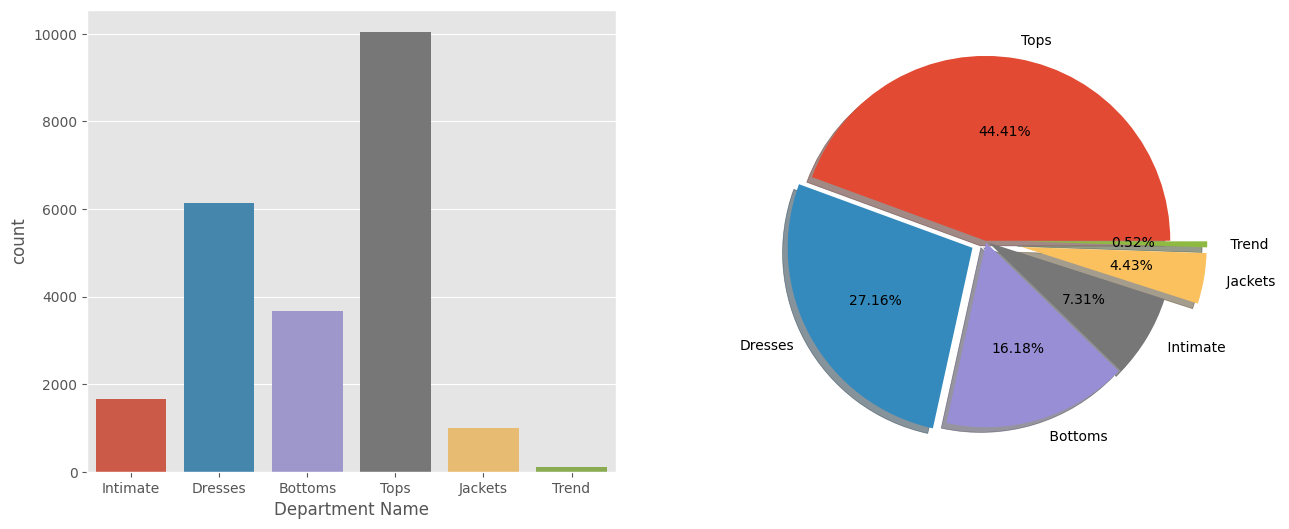

In [ ]:
plt.figure( figsize = (15 , 6))
plt.subplot (1, 2, 1)
sns.countplot(x = Data['Department Name'], data = Data)
plt . subplot (1, 2, 2)
plt.pie(x= Data['Department Name']. value_counts() ,labels =( 'Tops',
'Dresses'," Bottoms "," Intimate "," Jackets "," Trend ") ,explode = (0, 0.08 ,0.01 ,0.02 ,0.2 ,0.2) , shadow = True , autopct = '%1.2f%%')

plt . show ()

**Xử lí và đánh giá theo độ dài bài đánh giá và tiêu đề**

In [ ]:
Data1 = Data.copy()
Data1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Làm sạch tiêu đề đánh giá để tìm độ dài tiêu đề
Data1['Title'] = Data1['Title'].fillna('')
Data1[Data1['Title'] == ' '] = ''

In [ ]:
# Tìm ra số lượng tiêu đề không có đánh giá
no_review = (Data1[Data1['Review Text'] == ''].shape[0] / Data1.shape[0]) * 100
no_title = (Data1[Data1['Title'] == ''].shape[0] / Data1.shape[0]) * 100
print('{:.2f} percent of rows have no review and {:.2f} percent have no title'.format(no_review,no_title))

0.00 percent of rows have no review and 13.11 percent have no title


In [ ]:
Data1['Rating Class'] = Data1['Rating'].map({
    5: 'Positive',
    4: 'Positive',
    3: 'Neutral',
    2: 'Negative',
    1: 'Negative'
})

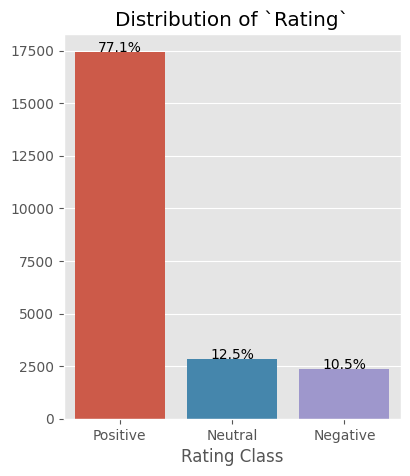

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1,4,3)
ax = sns.countplot(data= Data1, x='Rating Class')
plt.title('Distribution of `Rating`')
plt.ylabel('')
# Add normalized counts to Rating plot
total = float(len(Data1['Rating Class']))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+0.5, '{:.1%}'.format(height/total), ha="center")

plt.show()

Phần lớn đánh giá đều tích cực



In [ ]:
# Tìm cột độ dài Đánh giá và Độ dài tiêu đề
Data1['Review Length'] = Data1['Review Text'].apply(lambda x: len(x.split(' ')))
Data1['Title Length'] = Data1['Title'].apply(lambda x: len(x.split(' ')))


In [ ]:
Data1['Review Length'].max()

115

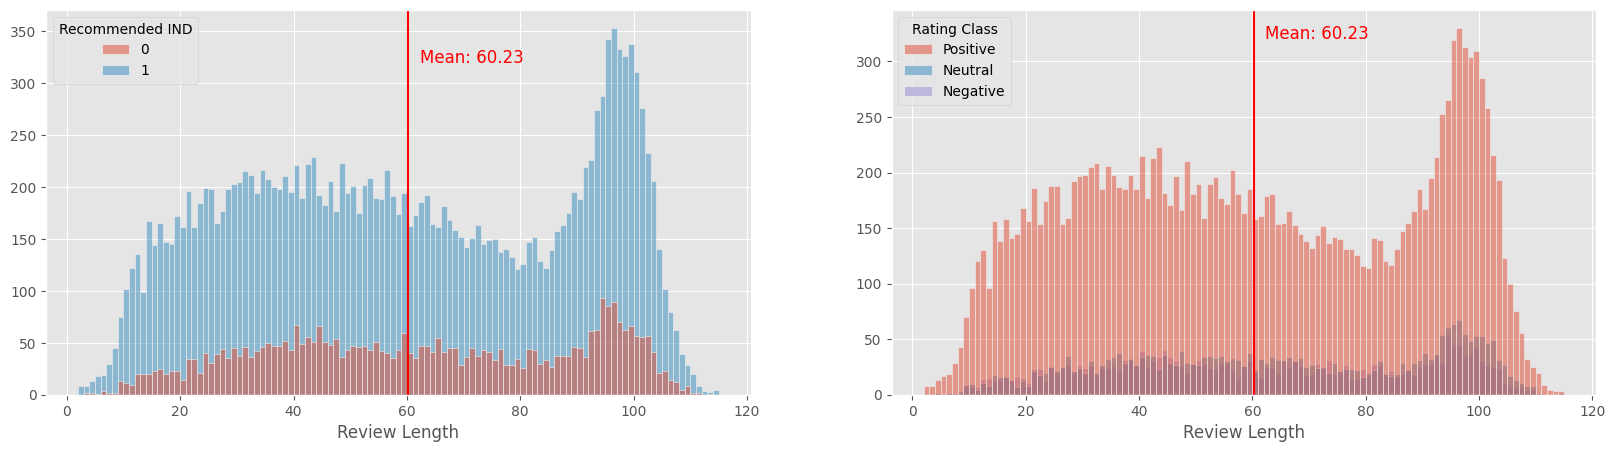

In [ ]:
fig = plt.figure(figsize=(20,5))

# Subplot for `Review Length`
ax1 = plt.subplot(1,2,1)
sns.histplot(data=Data1[Data1['Review Length'] > 1], x='Review Length', bins=np.ptp(Data1['Review Length']), hue='Recommended IND')
plt.title('')
plt.ylabel('')

# Add mean line for `Review Length`
mean_length = Data1['Review Length'].mean()
ax1.axvline(mean_length, color='red', label='Mean')
plt.text(mean_length + 2, 320, f"Mean: {mean_length:.2f}", color='red', fontsize=12)


# Subplot for `Review Length`
ax1 = plt.subplot(1,2,2)
sns.histplot(data=Data1[Data1['Review Length'] > 1], x='Review Length', bins=np.ptp(Data1['Review Length']), hue='Rating Class')
plt.title('')
plt.ylabel('')

# Add mean line for `Review Length`
mean_length = Data1['Review Length'].mean()
ax1.axvline(mean_length, color='red', label='Mean')
plt.text(mean_length + 2, 320, f"Mean: {mean_length:.2f}", color='red', fontsize=12)

plt.show()

Các bài đánh giá tích cực và các bài đánh giá bao gồm đề xuất đôi khi có thể có nhiều từ hơn trong văn bản đánh giá. Với những bài có điểm đánh giá tích cực và được để xuất thì khách hàng có xu hướng viết đánh giá nhiều hơn

**II. Phân tích ngôn ngữ tự nhiên NLTK**

In [ ]:
data= Data1[['Title','Review Text', 'Rating','Class Name','Recommended IND']].reset_index(drop = True)

In [ ]:
# Tạo một cột mới chứa tiêu đề và chi tiết đánh giá
data['Total Text'] = data['Title'] + '. ' +data['Review Text']
data['Sentiment'] = np.where(data['Rating']>=4, 1, 0)
data.head(10)

,Title,Review Text,Rating,Class Name,Recommended IND,Total Text,Sentiment
0,,Absolutely wonderful - silky and sexy and comf...,4,Intimates,1,. Absolutely wonderful - silky and sexy and co...,1
1,,Love this dress! it's sooo pretty. i happene...,5,Dresses,1,. Love this dress! it's sooo pretty. i happe...,1
2,Some major design flaws,I had such high hopes for this dress and reall...,3,Dresses,0,Some major design flaws. I had such high hopes...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants,1,"My favorite buy!. I love, love, love this jump...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,5,Blouses,1,Flattering shirt. This shirt is very flatterin...,1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,Dresses,0,Not for the very petite. I love tracy reese dr...,0
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,Knits,1,Cagrcoal shimmer fun. I aded this in my basket...,1
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,Knits,1,"Shimmer, surprisingly goes with lots. I ordere...",1
8,Flattering,I love this dress. i usually get an xs but it ...,5,Dresses,1,Flattering. I love this dress. i usually get a...,1
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,Dresses,1,"Such a fun dress!. I'm 5""5' and 125 lbs. i ord...",1


1. Xử lí ngôn ngữ tự nhiên

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger' )
from nltk import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')
import re
from bs4 import BeautifulSoup
from gensim.models import word2vec, Phrases
stemmeer = nltk.SnowballStemmer("english")
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Đánh giá vẽ chung tần số các từ**





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1) , stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_of_words = bow.sum(axis = 0)
    words_freq = [(words, sum_of_words[0,idx]) for words , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    return words_freq[:n]

In [ ]:
review_freq = get_top_n_words(data['Total Text'], 10)
review_freq

[('dress', 12220),
 ('love', 10812),
 ('size', 8974),
 ('fit', 7935),
 ('great', 7905),
 ('like', 7386),
 ('wear', 6551),
 ('just', 5830),
 ('fabric', 5081),
 ('small', 5066)]

In [ ]:
review_freq = get_top_n_words(data['Total Text'], 10)
df1 = pd.DataFrame(review_freq, columns = ['Unigram', 'Frequency']).set_index('Unigram')
df1

,Frequency
Unigram,
dress,12220
love,10812
size,8974
fit,7935
great,7905
like,7386
wear,6551
just,5830
fabric,5081


**Đánh giá chung**

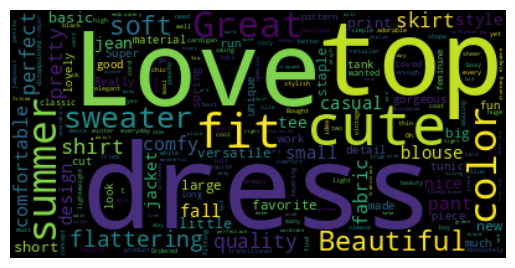

In [ ]:
from wordcloud import WordCloud
text = " ".join(cat.split()[1] for cat in data['Total Text'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'Black').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Phân loại chi tiết đánh giá**

In [ ]:
from textblob import TextBlob
import string

a. Bỏ dấu câu

In [ ]:

def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [ ]:
data['Review'] = data['Total Text'].apply(punctuation_removal)
data['Review'].head()

0     Absolutely wonderful  silky and sexy and comf...
1     Love this dress  its sooo pretty  i happened ...
2    Some major design flaws I had such high hopes ...
3    My favorite buy I love love love this jumpsuit...
4    Flattering shirt This shirt is very flattering...
Name: Review, dtype: object

- Xóa trạng từ, chỉ từ, đại từ quan hệ

In [ ]:
def adj_collector(review_string):
    new_string=[]
    review_string = word_tokenize(review_string)
    tup_word = nltk.pos_tag(review_string)
    for tup in tup_word:
        if 'VB' in tup[1] or tup[1]=='JJ':  #Verbs and Adjectives
            new_string.append(tup[0])
    return ' '.join(new_string)

In [ ]:
data['Review'] = data['Review'].apply(adj_collector)
data['Review'].head(3)

0                                wonderful comfortable
1    Love happened find im did have ordered online ...
2    major had such high wanted work i ordered smal...
Name: Review, dtype: object

- Xóa từ dừng

In [ ]:

stop = stopwords.words('english')
stop.append("i'm")

In [ ]:
stop_words = []

for item in stop:
    new_item = punctuation_removal(item)
    stop_words.append(new_item)


Thêm một số từ ngữ chỉ quần áo

In [ ]:
clothes_list =['dress', 'top','sweater','shirt',
               'skirt','material', 'white', 'black',
              'jeans', 'fabric', 'color','order', 'wear']

In [ ]:
def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str
            if word.lower() not in stop_words and word.lower() not in clothes_list]


In [ ]:
data['Review'] = data['Review'].apply(stopwords_removal)
data['Review'].head()

0                             [wonderful, comfortable]
1    [love, happened, find, ordered, online, bc, bo...
2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
Name: Review, dtype: object

- Xóa từ ngữ chỉ số lượng

In [ ]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

In [ ]:
data['Review'] = data['Review'].apply(drop_numbers)
data['Review'].head()

0                                wonderful comfortable
1    love happened find ordered online bc bought lo...
2    major high wanted work ordered small usual fou...
3                favorite love love fabulous get great
4    flattering flattering due adjustable perfect p...
Name: Review, dtype: object

- Stremme

In [ ]:
stemmer = PorterStemmer()
data['Review'] = data['Review'].apply(lambda x: x.split())
data['Review'].head()

0                             [wonderful, comfortable]
1    [love, happened, find, ordered, online, bc, bo...
2    [major, high, wanted, work, ordered, small, us...
3         [favorite, love, love, fabulous, get, great]
4    [flattering, flattering, due, adjustable, perf...
Name: Review, dtype: object

In [ ]:
def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = stemmer.stem(word)
        text_list_new.append(word)
    return text_list_new

In [ ]:
data['Review'] = data['Review'].apply(stem_update)
data['Review'].head()

0                                    [wonder, comfort]
1    [love, happen, find, order, onlin, bc, bought,...
2    [major, high, want, work, order, small, usual,...
3             [favorit, love, love, fabul, get, great]
4    [flatter, flatter, due, adjust, perfect, pair,...
Name: Review, dtype: object

In [ ]:
data1= data[['Review','Sentiment']]
data1.head()

,Review,Sentiment
0,"[wonder, comfort]",1
1,"[love, happen, find, order, onlin, bc, bought,...",1
2,"[major, high, want, work, order, small, usual,...",0
3,"[favorit, love, love, fabul, get, great]",1
4,"[flatter, flatter, due, adjust, perfect, pair,...",1


In [ ]:
data1=data1.rename(columns = {'Review':'Total Text'})
data1.head()

,Total Text,Sentiment
0,"[wonder, comfort]",1
1,"[love, happen, find, order, onlin, bc, bought,...",1
2,"[major, high, want, work, order, small, usual,...",0
3,"[favorit, love, love, fabul, get, great]",1
4,"[flatter, flatter, due, adjust, perfect, pair,...",1


- WordCloud- biểu thị từ ngữ

In [ ]:
pos_df = data[data.Sentiment == 1]
neg_df = data[data.Sentiment == 0]



In [ ]:
from wordcloud import WordCloud
pos_word =[]
neg_word = []
pos_word = " ".join(str(review) for review in pos_df.Review)
neg_word = ' '.join(str(review) for review in neg_df.Review)

**Với những bài đánh giá tích cực**

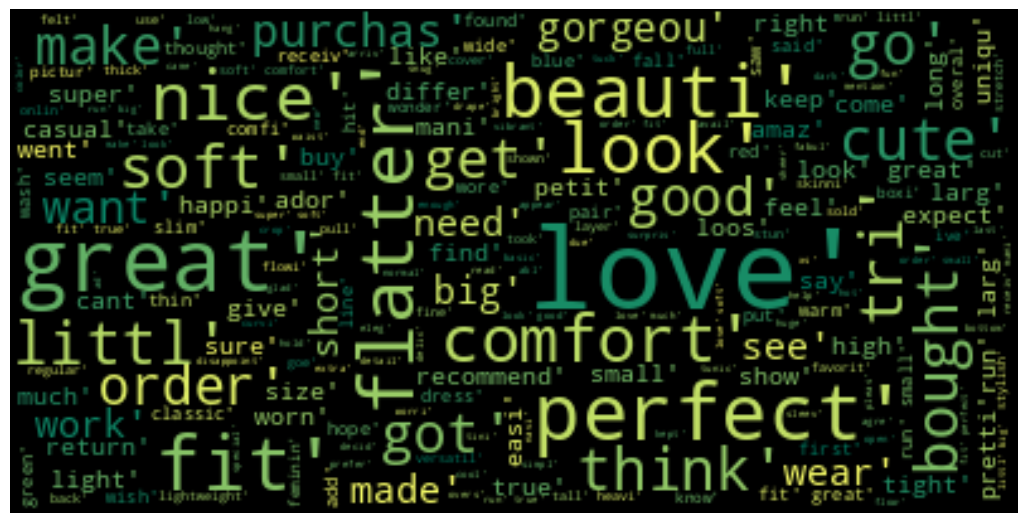

In [ ]:
wordcloud = WordCloud().generate(pos_word)

wordcloud = WordCloud(background_color="Black",max_words=len(pos_word),\
                 max_font_size=45, relative_scaling=.5,colormap='summer').generate(pos_word)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Các bài đánh giá tích cực, các từ "love": 7956 lần, "great":5498 lần, "fit": 5218,
"perfect": 3185,"comfort":3164, "beati":2636, "nice":2386 Chứng tỏ khách hàng ưa
thích và đánh giá cao các sản phẩm này

**Với những bài đánh giá tiêu cực**

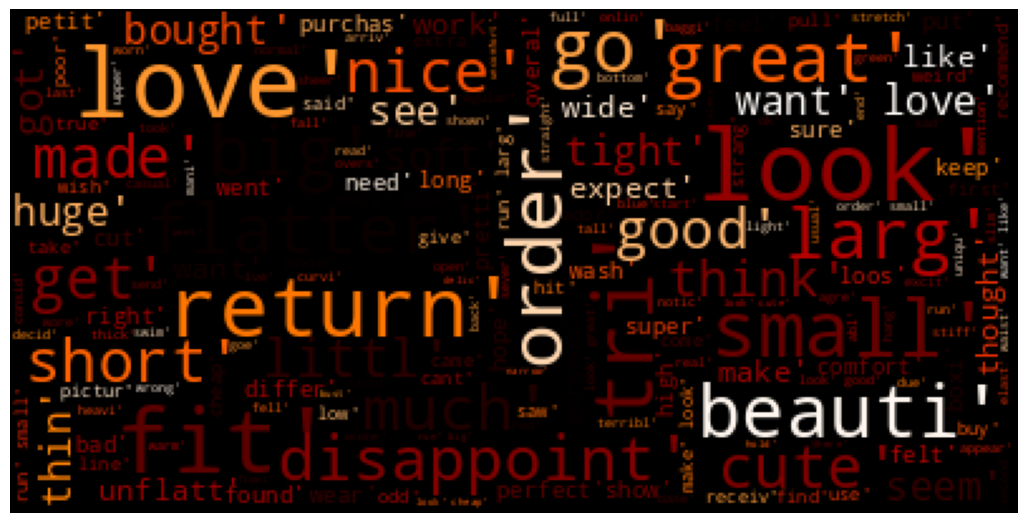

In [ ]:
wordcloud = WordCloud().generate(neg_word)

wordcloud = WordCloud(background_color="Black",max_words=len(neg_word),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_word)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Nhận thấy,với những đánh giá tiêu cực, xuất hiện các từ ngữ " Dissapoint": 662,"
small":1300,"big": 700," large":876, "return":1020, bên cạnh vẫn xuất hiện các từ
tích cực như:" love": 1784,"great":766. Điều đó chứng tỏ rằng, tuy sản phẩm không
phù hợp với bản thân khách hàng nhưng chất lượng và vẫn tốt với người khác

III.**Mô hình đánh giá theo Navie Bayes**

- Mô hình này sẽ lấy các bài đánh giá làm đầu vào. Sau đó, nó sẽ đưa ra dự đoán về việc đánh giá là tích cực hay tiêu cực.

- Sử dụng các mô hình Navie Bayes để đánh giá





**Thiết lập huấn luyện và thử nghiệm**

Sử dụng bộ đếm véc tơ từ thư viện Scikit-learning.

Điều này sẽ chuyển đổi văn bản trong khung dữ liệu của chúng ta thành một mô hình túi từ, mô hình này sẽ chứa một ma trận số nguyên thưa thớt. Số lần xuất hiện của mỗi từ sẽ được đếm và in ra.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

Để tiến hành phân lớp sản phẩm,ta tiến hành tách các cột thành các biến phụ thuộc
và độc lập. Sau đó, ta chia các biến đó thành các tập huấn luyện và thử nghiệm (train và test) với tỷ lệ train là 80% và test là 20%

In [ ]:
vectorizer = CountVectorizer()
train_data,test_data = train_test_split(data,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['Total Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Total Text'])
y_test = test_data['Sentiment']

- Mô hình Navie Bayes

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
data2 = train_data.copy()
data2['Naive Bayes'] = model.predict(X_train)
data2.head()

,Title,Review Text,Rating,Class Name,Total Text,Sentiment,Review,Naive Bayes
16271,,"The dress is well-made and very nice, just didn't suit all of my lumps and bumps. wasn't super forgiving. also, i'm 5'8"" and it was a bit shorter than i expected. otherwise, a great dress!",4,Dresses,". The dress is well-made and very nice, just didn't suit all of my lumps and bumps. wasn't super forgiving. also, i'm 5'8"" and it was a bit shorter than i expected. otherwise, a great dress!",1,wellmade nice super expected great,1
925,,"I really did not need another coat at all, but i couldn't resist. got it in green - it's dark and woodsy,something robin hood and his merry men could wear in the forest to look and feel their most stylish. the structure is just right - this coat is soft, cozy and fluid, but also tailored enough to wear in a business casual environment... equally well-suited to wear on winter eve dog walks, to a football game, or at the coffee shop for a latte at an outside table. works with most of my wardrobe -",5,Sweaters,". I really did not need another coat at all, but i couldn't resist. got it in green - it's dark and woodsy,something robin hood and his merry men could wear in the forest to look and feel their most stylish. the structure is just right - this coat is soft, cozy and fluid, but also tailored enough to wear in a business casual environment... equally well-suited to wear on winter eve dog walks, to a football game, or at the coffee shop for a latte at an outside table. works with most of my wardrobe -",1,need got green woodsysomething look feel stylish soft tailored casual wellsuited eve outside,1
4330,Funky plaid!,"The moment i saw this dress, i knew i had to have it. the plaid is beautiful with tones of red, blue and periwinkle. the photos on the website are very true. the unexpected pockets make it even cuter. i also got the sandals as pictured because i love the whole look. i an 5'5"" and usually wear a 4 or 6. i got the small and then wondered if it were too big. i ended up going back and trying on the extra small, but it turns out the small was correct. it should hang and drape and it not meant to be f",5,Dresses,"Funky plaid!. The moment i saw this dress, i knew i had to have it. the plaid is beautiful with tones of red, blue and periwinkle. the photos on the website are very true. the unexpected pockets make it even cuter. i also got the sandals as pictured because i love the whole look. i an 5'5"" and usually wear a 4 or 6. i got the small and then wondered if it were too big. i ended up going back and trying on the extra small, but it turns out the small was correct. it should hang and drape and it not meant to be f",1,plaid saw knew beautiful red periwinkle true unexpected make got pictured love whole got small wondered big ended going trying extra small turns small correct hang meant f,1
2223,Very cute,Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipper as well. a little stiff in the fabric. classic colors but decided not to keep only because i didn't feel like we could wear it all year round. can't petite or 0p was great (115 lbs),5,Skirts,Very cute. Love the asymmetrical hem. waist fit snugly as in perfectly. it ties in two spots with a hidden zipper as well. a little stiff in the fabric. classic colors but decided not to keep only because i didn't feel like we could wear it all year round. can't petite or 0p was great (115 lbs),1,cute asymmetrical ties hidden little classic decided keep feel great,1
22467,Cute country tunic,I just got this shirt the other day at the store.\r\nto my surprise i needed a size zero. i usually wear a size 4 or small never that small. \r\ni am 5'4 and a 34dd and it was still a little loose!! i bought the blue and brown color combination.\r\nit looked really cute on with a pair of white jeans for summer.,4,Blouses,Cute country tunic. I just got this shirt the other day at the store.\r\nto my surprise i needed a size zero

**Ma trận lỗi Confunsion matrix**

<Axes: >

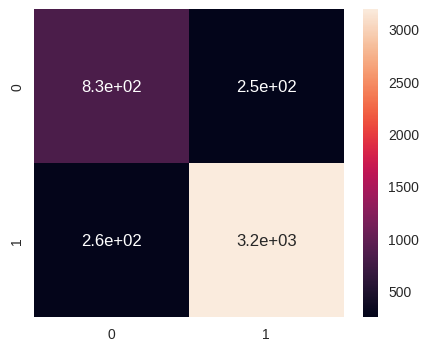

In [ ]:

plt.figure(figsize =(5 ,4) )
sns.heatmap(confusion_matrix(y_test.values, model.predict(X_test)) , annot = True )

Đánh giá ma trận lỗi

In [ ]:
confusion_matrix1= confusion_matrix(y_test.values, model.predict(X_test))
FN = confusion_matrix1 [0][1]
FP = confusion_matrix1 [1][0]
TP = confusion_matrix1 [1][1]
TN = confusion_matrix1 [0][0]
TPR = TP /( TP+FN)
TNR = TN /( TN+FP)
FPR =1- TPR
FNR =1- TNR
print (" True Positive Rate - "+ str(TPR))
print (" True Negative Rate - "+ str(TNR))
print (" False Positive Rate - "+ str(FPR))
print (" False Negative Rate - "+ str(FNR))
print (" Sensitivity - "+str (TPR))
print (" Specificity - "+str (TNR))

 True Positive Rate - 0.9283634245777519
 True Negative Rate - 0.7591575091575091
 False Positive Rate - 0.0716365754222481
 False Negative Rate - 0.24084249084249088
 Sensitivity - 0.9283634245777519
 Specificity - 0.7591575091575091


Kiểm tra mô hình

In [ ]:
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline


In [ ]:
print("Confuncion Matrix:\n ", nb_cm)
print("\n Naive Bayes")
print(mt.classification_report(y_test, model.predict(X_test)))


Confuncion Matrix:
  [[ 829  246]
 [ 263 3188]]

 Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1075
           1       0.93      0.92      0.93      3451

    accuracy                           0.89      4526
   macro avg       0.84      0.85      0.85      4526
weighted avg       0.89      0.89      0.89      4526



-Nhận thấy, Độ chính xác của phép phân loại là accuracy = 89%, cho thấy mô
hình tương đối tốt. F 1 − score ở lớp 0 và 1 đều khá cao, cho thấy mô hình tương
đối được cân bằng, việc lựa chọn dữ liệu đánh giá tương đối chính xác.


**Mối quan hệ giữa độ chính xác và kiểm tra**

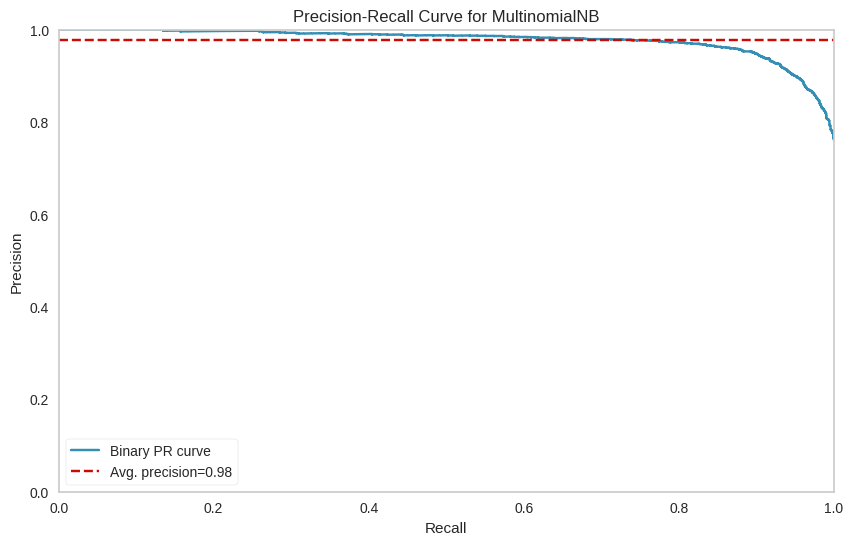

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
MultinomialNB(),
classes=model.classes_,
per_class=True,
cmap="Set1"
)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('White')
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();


Qua đánh giá phân loại Sentiment Analysis sử dụng cách phân loại
Navie Nayes đã đưa ra được các kết quả tương đối tốt với độ chính xác khá cao cho cả mô hình lên đến 89% và cho đánh giá 0 là 73%, 1 là 93%. Mô hình đánh giá thu được
là tương đối cân bằng, một phần phản ánh phép xử lí dữ liệu là phù hợp.

IV.**Kêt Luận**

Thuật toán phân loại bằng Naive Bayes có thể áp dụng cho phân loại dữ liệu và
qua phân loại trên,cho thấy mô hình đã thỏa mãn điều kiện cân bằng lớp. Ngoài ra,
cũng có thể áp dụng một số thuật toán phân lớp tốt hơn với bộ dữ liệu lớn hơn để có
được độ chính xác cao hơn như Mô hình SVC, thuật toán Logistics. Khi đó, các nhà
sản xuất có thể những giải pháp phát triển sản phẩm và dịch vụ chăm sóc khách hàng
tốt hơn với từng nhóm khách hàng riêng biệt.